In [20]:
#importing libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Importing and cleaning data

In [21]:
df = pd.read_csv('Diwali Sales Data.csv',encoding = 'unicode escape')

In [22]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [23]:

df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [25]:
df.drop(['Status', 'unnamed1'],axis=1, inplace =True)

In [26]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [27]:
df.dropna(inplace =True)

In [28]:
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [29]:
df['Amount'] = df['Amount'].astype('int')

In [30]:
df['Amount'].dtypes

dtype('int32')

# *EDA*

### Gender

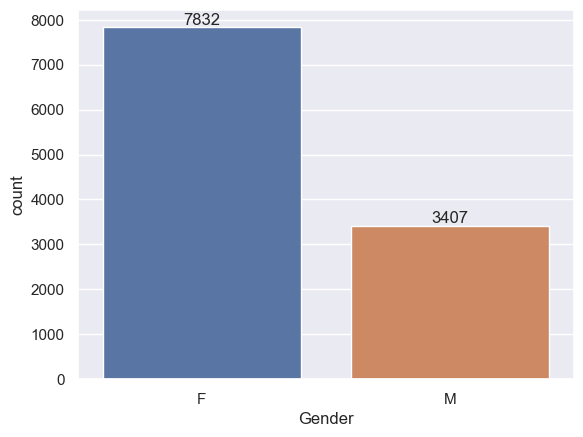

In [31]:
ax = sns.countplot(x = 'Gender' , data = df)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

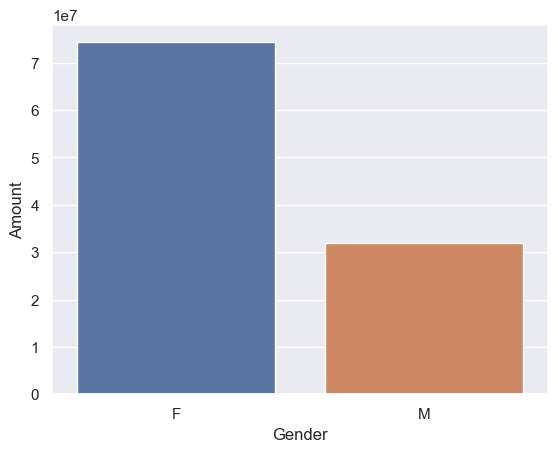

In [32]:
sales_gen = df.groupby(['Gender'],as_index= False)['Amount'].sum().sort_values(by = 'Amount' , ascending = False)
sns.barplot(x= 'Gender', y= 'Amount', data = sales_gen)

from the above graph it is clear that Female have more purchasing power than Males

## Age

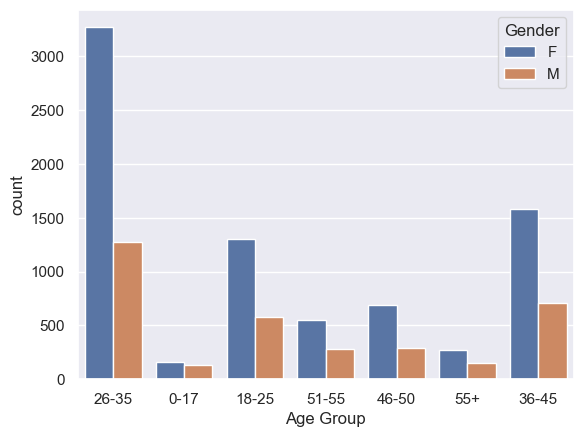

In [33]:
ax= sns.countplot(x= 'Age Group', hue = 'Gender', data=df)

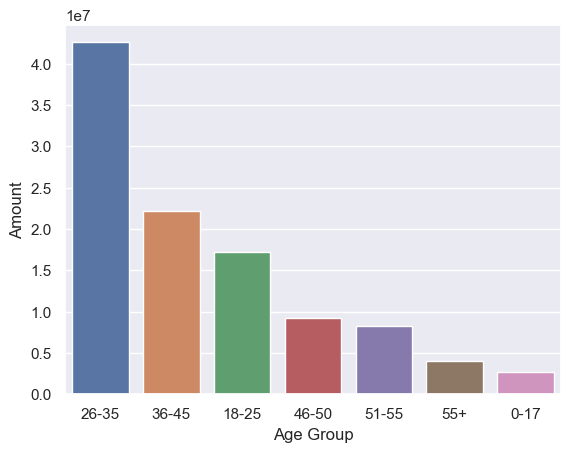

In [34]:
sales_age = df.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending = False)

ax = sns.barplot(x= 'Age Group', y= 'Amount', data = sales_age)

from the above analysis we can know that age group of 26-35 are the majority buyers

## state

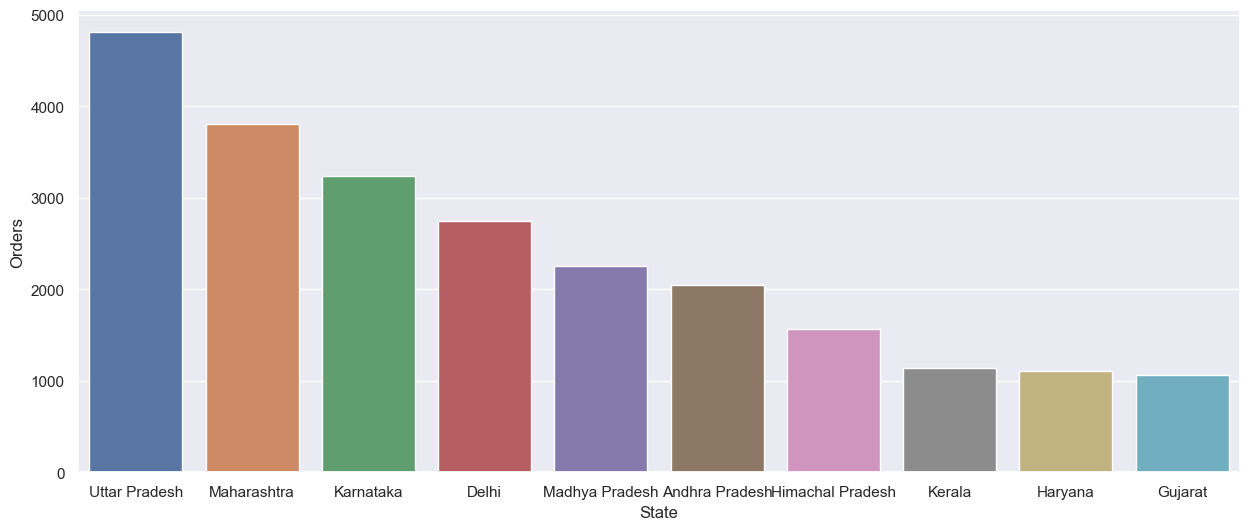

In [40]:
sales_state = df.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)
sns.barplot(data = sales_state, x = 'State',y= 'Orders')
sns.set(rc={'figure.figsize': (10,5)})


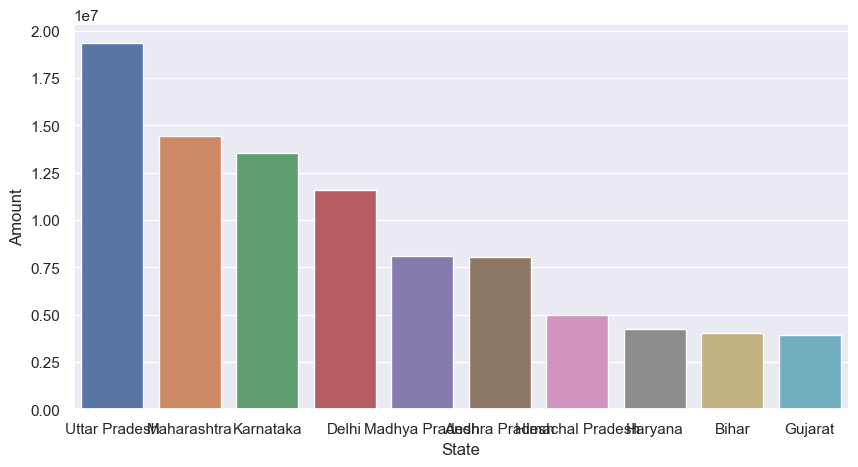

In [43]:
sales_State = df.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by = 'Amount' , ascending = False).head(10)
ax = sns.barplot(data = sales_State, x = 'State', y = 'Amount')
sns.set(rc={'figure.figsize':(10,5)})

## Occupation

In [46]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


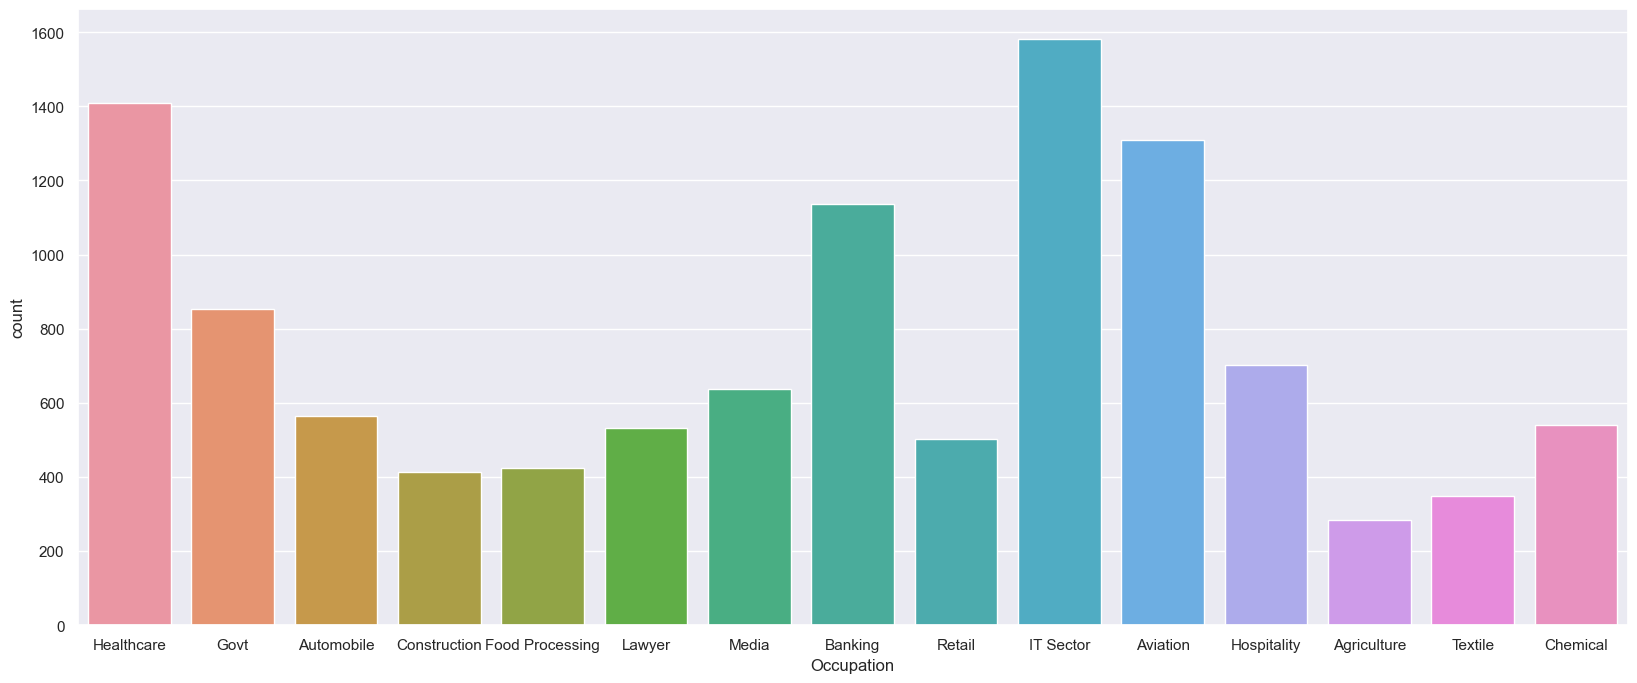

In [60]:
sns.countplot(data = df , x = 'Occupation')
for bars in ax.containers:
    ax.bar_label(bars)
    sns.set(rc={'figure.figsize':(20,8)})

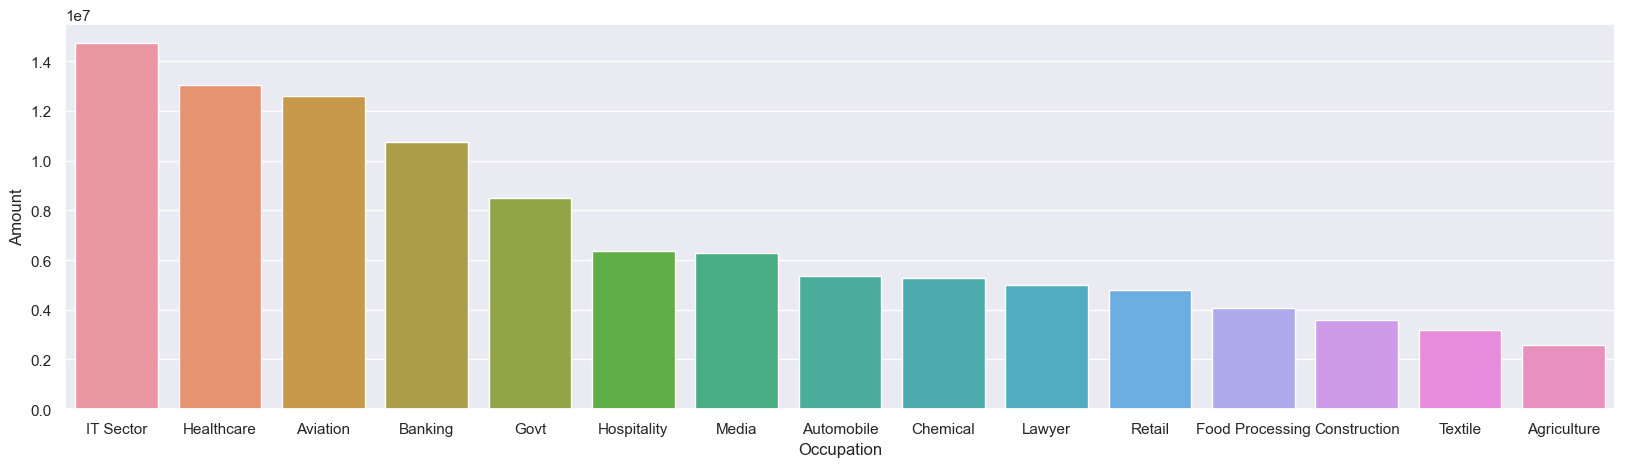

In [59]:
#sales_occ =   df.groupby(['Occupation'], as_index = False)['Amount'].sum().sort values(by = 'Amount', ascending = False)
sales_occ = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(data = sales_occ, x = 'Occupation', y = 'Amount')
sns.set(rc={'figure.figsize':(20,8)})


## Product Category

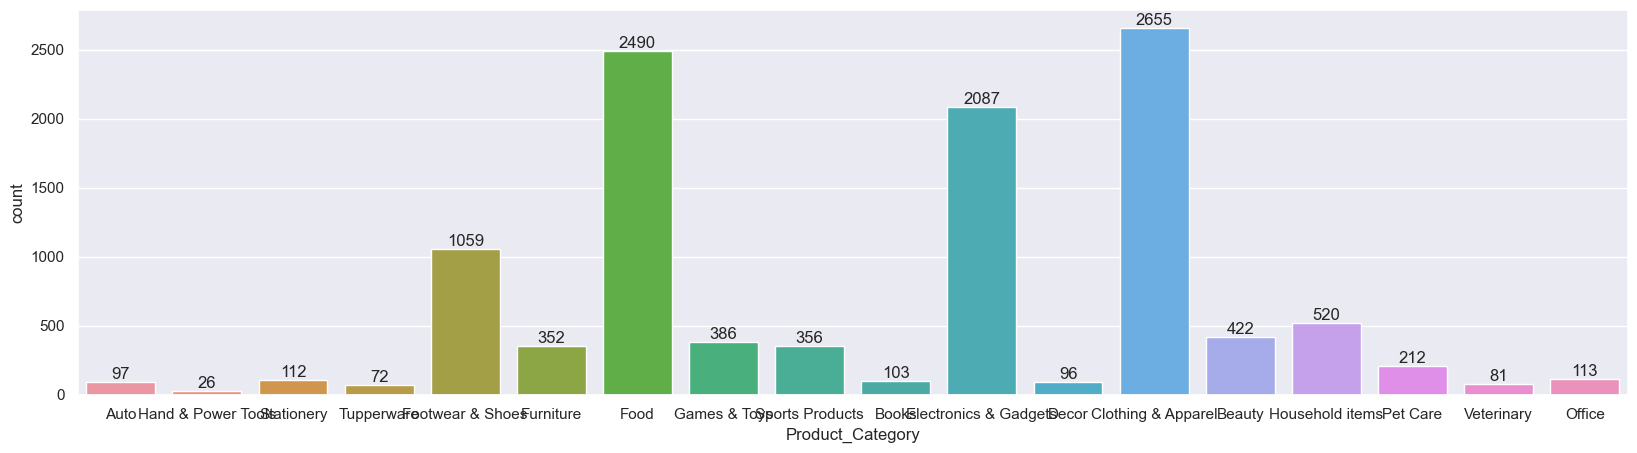

In [61]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

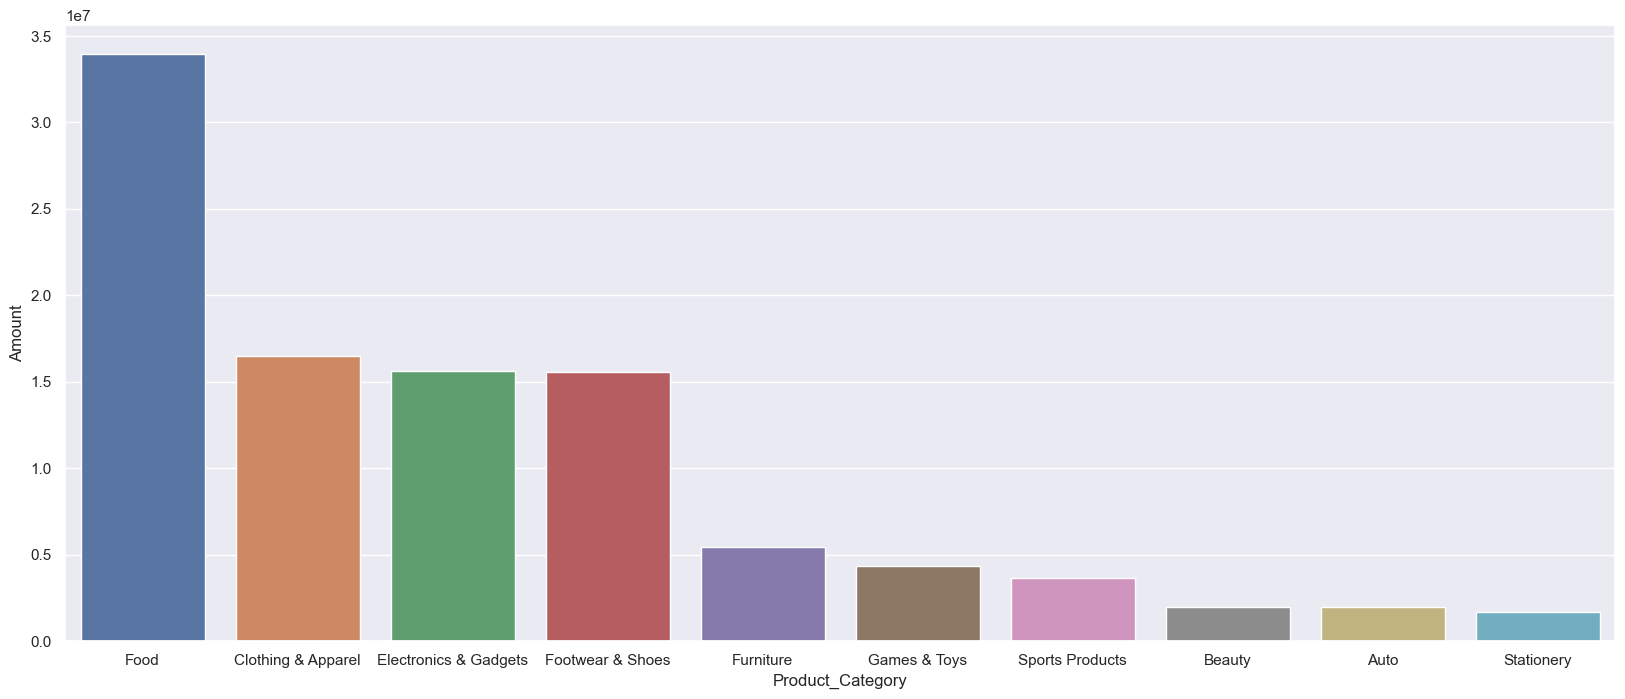

In [63]:
sales_cat = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.barplot(data = sales_cat, x = 'Product_Category', y = 'Amount')
sns.set(rc={'figure.figsize':(20,8)})


## Conclusion


By  the above analysis we can know that age group of 18 -45 and "Females" contribute to the majority of the purchases in this quaters sales and the most brought categorys are Food, Clothing and Electronics

Thank You!!!